### MACHINE LEARNING PROJECT: MOBILE PHONE PRICE PREDICTION

### Introduction


##### In this project, we are going to explore and analyze a dataset which contains specifications of two thousand mobile phones and try to predict optimum price ranges for a list of mobile phones in the market by applying various machine learning algorithms such as logistic regression, decision tree, random forest and k-nearest neighbors(knn).
You can reach the data set from link https://www.kaggle.com/iabhishekofficial/mobile-price-classification

In [1]:
# The libraries & modules which we are going to use in our study:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# First of all, we load our data as a csv file:
data = pd.read_csv("D:\Data Science !!\My project\phone/data.csv")

#### Explore the dataset

Let's explore our dataset.

In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

###### Here is the attributes of our dataset:

id: ID

battery_power: Total energy a battery can store in one time measured in mAh

blue: Has bluetooth or not

clock_speed: speed at which microprocessor executes instructions

dual_sim: Has dual sim support or not

fc: Front Camera mega pixels

four_g: Has 4G or not

int_memory: Internal Memory in Gigabytes

m_dep: Mobile Depth in cm

mobile_wt: Weight of mobile phone

n_cores: Number of cores of processor

pc: Primary Camera mega pixels

px_height: Pixel Resolution Height

px_width: Pixel Resolution Width

ram: Random Access Memory in Megabytes

sc_h: Screen Height of mobile in cm

sc_w: Screen Width of mobile in cm

talk_time: longest time that a single battery charge will last when you are

three_g: Has 3G or not

touch_screen: Has touch screen or not

wifi: Has wifi or not

price_range: This is the target variable with value of 0 (low cost),
1 (medium cost), 2 (high cost) and 3 (very high cost)

In [5]:
data.shape

(2000, 21)

We have 2000 row and 21 columns.

The last attribute is a target attribute,

which means that we have labeled data.

In [9]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [12]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

We do not have any null values in our dataset. It will ease the preprocessing step.

In [13]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


As mentioned above, our data have labels and we will apply supervised learning algorithms.

We define our target column as "y" and rest of the data which are used as inputs as "x".

In [14]:
x = data.drop('price_range', axis = 1)
y = data['price_range']


In [20]:
y.unique()
# We have four price ranges as target values and will do multi-class classification in our study. 

array([1, 2, 3, 0], dtype=int64)

###### Let's see our dataset is balanced or imbalanced?

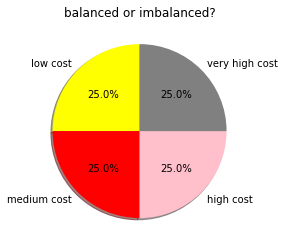

In [27]:
labels = ["low cost", "medium cost", "high cost", "very high cost"]
values = data['price_range'].value_counts().values
colors = ['yellow','red','pink', 'grey']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('balanced or imbalanced?')
plt.show()
#dataset is balanced

In addition to 'data.csv' file, we have a 'test_data.csv' file, but latter one does not have target data so we do not have the chance of testing our model with it.
We split our dataset into 'training' and 'validation' datasets. And, we are going to see our models' accuracy by applying them on validation dataset.

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101, stratify = y)

In [33]:
# check whether the split works correctly 
print(x_train.shape)
print(x_test.shape)

(1600, 20)
(400, 20)


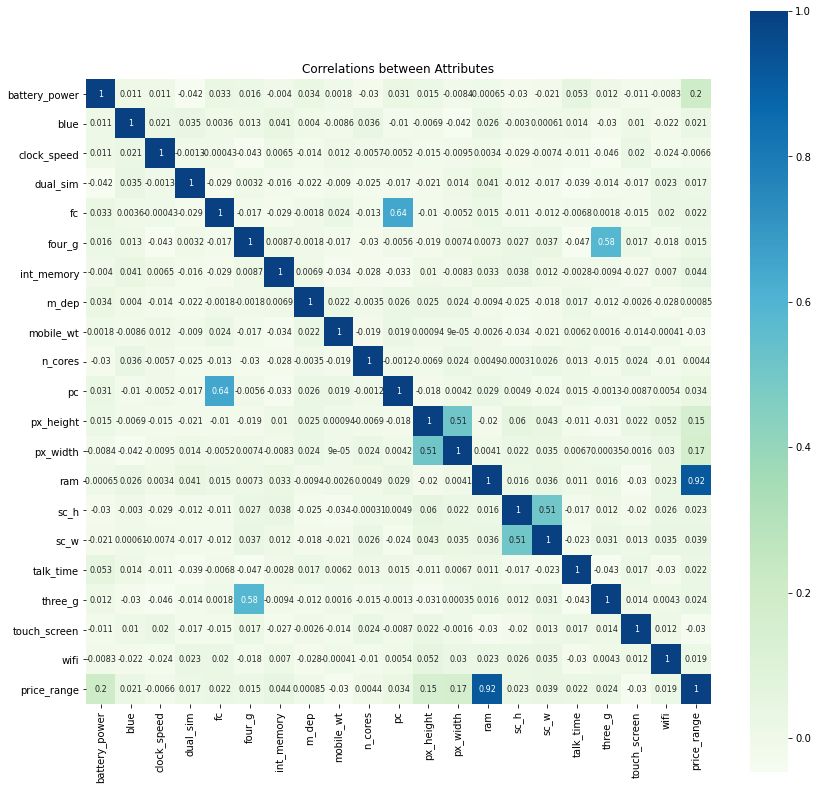

In [40]:
# Before going through machine learning applications,
#let's see the correlation btw features and target variable by plotting heatmap:

fig = plt.subplots (figsize = (14, 14))
sns.heatmap(data.corr (), square = True, cbar = True, annot = True, cmap="GnBu", annot_kws = {'size': 8})
plt.title('Correlations between Attributes')
plt.show ()

We see from the heatmap;

The most influential variable is ram.

Most of the variables have very little correlation to price range.

Primary camera mega pixels and front Camera mega pixels have correlation (it make sense because both of them reflect technology

Level of resolution of the related phone model) but they do not effect prige range.

Having 3G and 4G is somewhat correlated

There is no highly correlated inputs in our dataset, so there is no multicollinearity problem.

#### Implementation of ML Algorithms

To predict the mobile phone prices, we are going to apply below algorithms respectively on the training and validation dataset. After that, we are going to choose the best model for our data set and create target values for test dataset.

Logistic regression

Decision tree

Random forest

KNN

#### Logistic Regression
Target variables of the data set are discrete, hence, we are going to apply multiclass logistic regression model.

In [41]:
lr = LogisticRegression(multi_class = 'multinomial', solver = 'sag',  max_iter = 10000)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial', solver='sag')

In [42]:
y_pred_lr = lr.predict(x_test)

In [44]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
confusion_matrix

array([[88, 11,  1,  0],
       [ 8, 64, 25,  3],
       [ 0, 13, 58, 29],
       [ 0,  1, 17, 82]], dtype=int64)

In [46]:
acc_lr = metrics.accuracy_score(y_test, y_pred_lr)
acc_lr

0.73

#### Decision Tree
Decision tree is one of the most popular supervised learning algorithm that is mostly used in classification problems.

In [47]:
dt = DecisionTreeClassifier(random_state=101)
dt_model = dt.fit(x_train, y_train)

In [48]:
y_pred_dt = dt.predict(x_test)

In [54]:
dt_model

array([1, 3, 1, 2, 2, 3, 0, 0, 1, 0, 1, 0, 0, 3, 1, 3, 2, 0, 1, 3, 3, 3,
       2, 1, 2, 1, 3, 1, 3, 1, 1, 1, 3, 2, 3, 2, 1, 0, 1, 2, 2, 3, 0, 1,
       0, 0, 1, 0, 0, 3, 3, 1, 0, 3, 2, 3, 0, 2, 3, 0, 3, 3, 0, 3, 1, 1,
       1, 3, 1, 3, 0, 2, 0, 1, 1, 2, 3, 2, 2, 3, 3, 2, 3, 1, 1, 2, 3, 0,
       1, 2, 3, 3, 0, 1, 1, 1, 2, 0, 1, 3, 3, 3, 0, 1, 1, 2, 0, 2, 3, 2,
       2, 2, 0, 1, 3, 0, 3, 2, 3, 3, 0, 1, 1, 2, 0, 3, 3, 2, 0, 3, 1, 0,
       2, 0, 1, 2, 2, 0, 3, 0, 0, 1, 1, 2, 2, 0, 2, 0, 1, 3, 0, 2, 2, 3,
       3, 3, 1, 0, 0, 2, 0, 0, 1, 2, 3, 3, 1, 3, 3, 2, 3, 2, 2, 3, 2, 1,
       2, 0, 0, 0, 3, 2, 0, 3, 1, 0, 2, 1, 0, 0, 0, 3, 0, 3, 1, 2, 2, 2,
       2, 0, 0, 1, 1, 2, 2, 1, 2, 1, 3, 1, 2, 0, 1, 2, 2, 2, 1, 1, 0, 2,
       2, 2, 3, 0, 1, 2, 0, 3, 0, 2, 3, 0, 2, 1, 1, 0, 2, 0, 3, 1, 2, 1,
       3, 0, 2, 2, 0, 2, 0, 1, 2, 0, 3, 1, 3, 2, 3, 3, 2, 2, 1, 3, 3, 2,
       0, 3, 3, 0, 0, 1, 1, 2, 0, 1, 2, 2, 2, 3, 1, 1, 0, 3, 0, 0, 2, 1,
       2, 2, 2, 2, 0, 0, 3, 1, 2, 1, 0, 1, 1, 2, 2,

After building a decision tree model, now, we are going to measure the performance of the model by means of confusion matrix:

In [56]:
print(metrics.confusion_matrix(y_test, y_pred_dt))

[[89 11  0  0]
 [ 7 74 19  0]
 [ 1  9 80 10]
 [ 0  0 12 88]]


In [58]:
# Even though precision and recall are good measures for imbalanced data, we can touch on these concepts here:
print(metrics.classification_report(y_test, y_pred_dt)) 

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       100
           1       0.79      0.74      0.76       100
           2       0.72      0.80      0.76       100
           3       0.90      0.88      0.89       100

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



How do we interpret the numbers in classification report?

Precision and recall metrices should be high as possible. They gives us accuracy level out of different classes.

We use f1-score to compare models that have different precision and recall levels.

In [59]:
acc_dt = metrics.accuracy_score(y_test, y_pred_dt)
acc_dt

0.8275

#### Random Forest
Random forest is a type of ensemble method of machine learning. It deals with overfitting problem and increase accuracy compared to a simple decision tree model.

In [60]:
rf = RandomForestClassifier(n_estimators = 100, random_state=101, criterion = 'entropy', oob_score = True) 
model_rf = rf.fit(x_train, y_train)

In [61]:
y_pred_rf = rf.predict(x_test) 

In [62]:
print(metrics.confusion_matrix(y_test, y_pred_rf)) 

[[91  9  0  0]
 [ 3 91  6  0]
 [ 0  7 85  8]
 [ 0  0  6 94]]


In [64]:
# Create confusion matrix
pd.crosstab(y_test, y_pred_rf, rownames=['Actual Class'], colnames=['Predicted Class'])

Predicted Class,0,1,2,3
Actual Class,,,,
0,91,9,0,0
1,3,91,6,0
2,0,7,85,8
3,0,0,6,94


In [66]:
acc_rf = metrics.accuracy_score(y_test, y_pred_rf)
acc_rf

0.9025

We see that accuracy score in random forest model is higher than decision tree accuracy score.

#### K-Nearest Neighbors (KNN)
'K' is the number of nearest training points which we classify them using the majority vote.

In [67]:
model_knn = KNeighborsClassifier(n_neighbors=3)  
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [69]:
y_pred_knn = model_knn.predict(x_test)  

In [71]:
print(metrics.confusion_matrix(y_test, y_pred_knn)) 

[[94  6  0  0]
 [ 3 96  1  0]
 [ 0  3 92  5]
 [ 0  0  7 93]]


In [73]:
print(accuracy_score(y_test, y_pred_knn)) 

0.9375


In the first try, we did not know the optimum 'k'.
Let's find the optimum 'k' value via Grid Search method and run knn model with this 'k'.

In [74]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':np.arange(1,30)}
knn = KNeighborsClassifier()

model = GridSearchCV(knn, parameters, cv=5)
model.fit(x_train, y_train)
model.best_params_

{'n_neighbors': 9}

After finding optimum k number, we run our model again with k=9.

In [75]:
model_knn = KNeighborsClassifier(n_neighbors=9)  
model_knn.fit(x_train, y_train)  

KNeighborsClassifier(n_neighbors=9)

In [76]:
y_pred_knn = model_knn.predict(x_test) 

In [78]:
print(metrics.confusion_matrix(y_test, y_pred_knn)) 

[[95  5  0  0]
 [ 2 96  2  0]
 [ 0  3 94  3]
 [ 0  0  6 94]]


In [80]:
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_knn

0.9475

### Conclusion

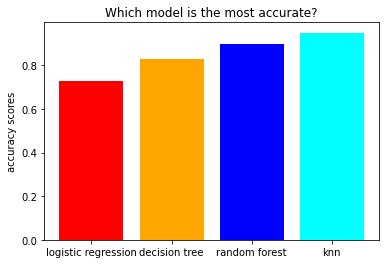

In [86]:
models = ['logistic regression', 'decision tree', 'random forest', 'knn']
acc_scores = [0.73, 0.83, 0.90, 0.95]

plt.bar(models, acc_scores, color=['red', 'orange', 'blue', 'cyan'])
plt.ylabel("accuracy scores")
plt.title("Which model is the most accurate?")
plt.show()

After training our dataset with four different model, we conclude that KNN is best model for our dataset. (via the highest accuracy score = 0.95)
Finally, we can run our KNN model to predict target values on the test dataset and add labels to dataset.

In [87]:
test_data = pd.read_csv("D:\Data Science !!\My project\phone/test_data.csv")

In [88]:
test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [89]:
# We did not have 'id' column in the traning and validation datasets, so, we delete it from test dataset to make the dimension of input dataset same.
test_data=test_data.drop('id',axis=1)

In [90]:
test_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [91]:
predicted_price_range = model_knn.predict(test_data) 

In [94]:
test_data['price_range'] = predicted_price_range

In [95]:
# We are able to forecast test dataset labels:
predicted_price_range

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 1, 3, 3, 2, 0, 2, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 3, 1, 2, 2, 3, 3, 2, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 3, 2, 3, 2, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 3, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [96]:
test_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1


We have achieved our goal and predicted price ranges for mobile phones in our new dataset.